In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
#Carga los dataset
li = []
for file in os.listdir("Dataset"):
    print('Reading file: ' + os.path.join("Dataset: ", file))
    df = pd.read_csv(os.path.join("Dataset", file))
    li.append(df)
TraficoTotal = pd.concat(li, axis=0, ignore_index=True)

Reading file: Dataset: /traffic122019.csv
Reading file: Dataset: /traffic022019.csv
Reading file: Dataset: /.DS_Store
Reading file: Dataset: /traffic062019 parte1.csv
Reading file: Dataset: /traffic032019.csv
Reading file: Dataset: /traffic082019.csv
Reading file: Dataset: /traffic112019.csv
Reading file: Dataset: /traffic012019.csv
Reading file: Dataset: /traffic102019.csv
Reading file: Dataset: /traffic092019.csv
Reading file: Dataset: /traffic052019.csv
Reading file: Dataset: /traffic042019.csv
Reading file: Dataset: /traffic062019.csv
Reading file: Dataset: /traffic 062019.csv
Reading file: Dataset: /traffic072019.csv


/Users/lopoloalex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [3]:
#Funcion que cambia el formato de las fechas 
def change_format(x):
    fec = str(x)
    ano=fec[0:4]
    mes=fec[4:6]
    dia=fec[6:8]
    tiempo=fec[8:14]
    final = ano + '/' + mes + '/' + dia + ' ' + tiempo[0:2] + ':' + tiempo[2:4] + ':' + tiempo[4:6] 
    return final 

In [4]:
#Router de mexico lleva en funcionamiento 5 años, es el primero que utilizar 
traInter =  TraficoTotal.loc[TraficoTotal.SC_ROUTER == 'CMEX-MEX-OCCRTRDW01']
traInter=traInter.iloc[:,[2,6]]
traInter.head()

,DT_MEASURE_DATETIME,NU_TRAFFIC_OUTPUT
759479,2.019120e+13,39392882.0
759480,2.019120e+13,35677690.0
759481,2.019120e+13,35799030.0
759482,2.019120e+13,38604984.0
759483,2.019120e+13,34438405.0


In [5]:
traInter['DT_MEASURE_DATETIME'] = traInter['DT_MEASURE_DATETIME'].apply(change_format)
traInter['DT_MEASURE_DATETIME'] = pd.to_datetime(traInter['DT_MEASURE_DATETIME'])
traInter.set_index('DT_MEASURE_DATETIME', inplace = True) #Lo seteo como indice 

In [6]:
df=traInter
dfMean = df.resample('24H').mean()

In [7]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
from statsmodels.tsa.stattools import adfuller
from numpy import log
from sklearn.metrics import mean_squared_error

/Users/lopoloalex/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


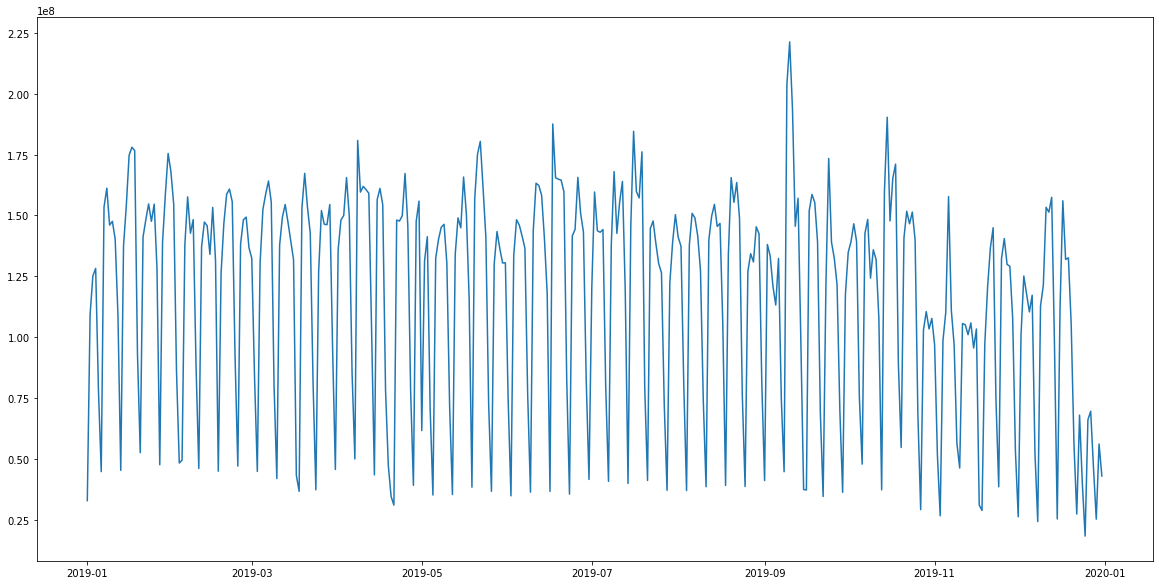

In [8]:
plt.figure(figsize=(20,10))
plt.plot(dfMean)

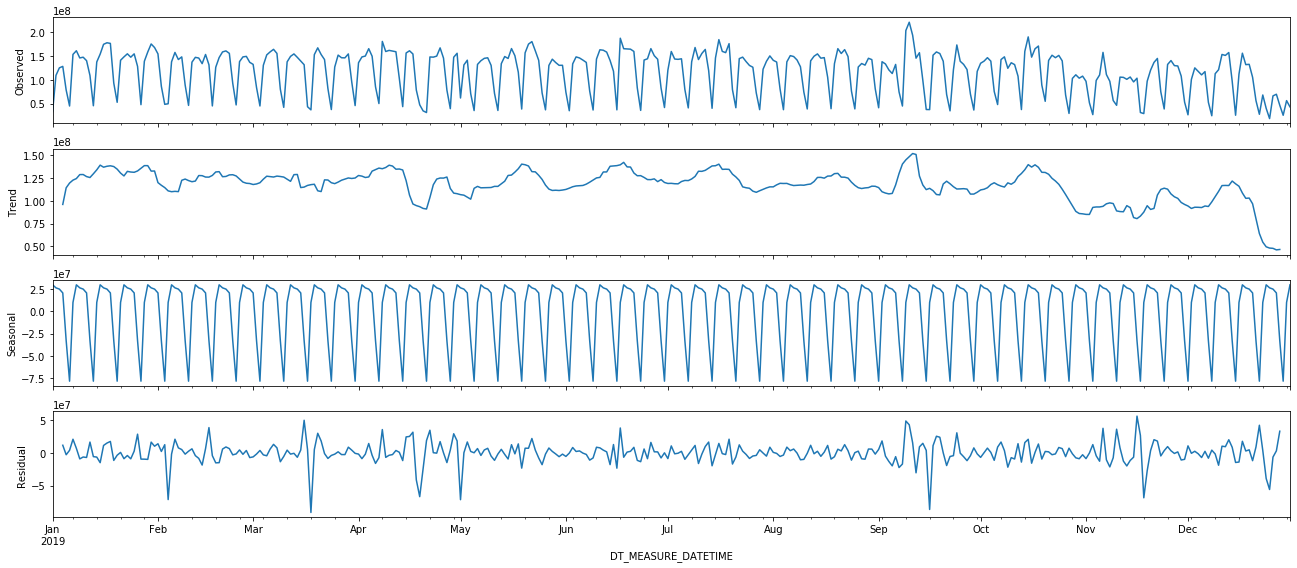

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(dfMean, model='additive')
fig = decomposition.plot()
plt.show()

In [10]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [13]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(dfMean,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:14609.033674024933
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:13955.322279731135
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:13723.120190760103
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:13095.695343361665
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:13729.665983336105
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:13573.696268164189
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:13212.757730874117
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:13067.189669923613
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:14306.298567446203
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:13792.217182576775
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:13553.597984653297
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:12964.411633701586
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:13844.276209505308
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:13746.61728290881
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:13096.499872519622
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:12964.1771516304
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:13881.404631815407
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:13355.89350665

In [10]:
mod = sm.tsa.statespace.SARIMAX(dfMean,
                                order=(1, 0, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0405      0.143      0.284      0.777      -0.240       0.321
ma.L1          0.6547      0.111      5.887      0.000       0.437       0.873
ma.S.L12      -0.7778      0.053    -14.559      0.000      -0.882      -0.673
sigma2      3.865e+15        nan        nan        nan         nan         nan


/Users/lopoloalex/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/Users/lopoloalex/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/lopoloalex/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/lopoloalex/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


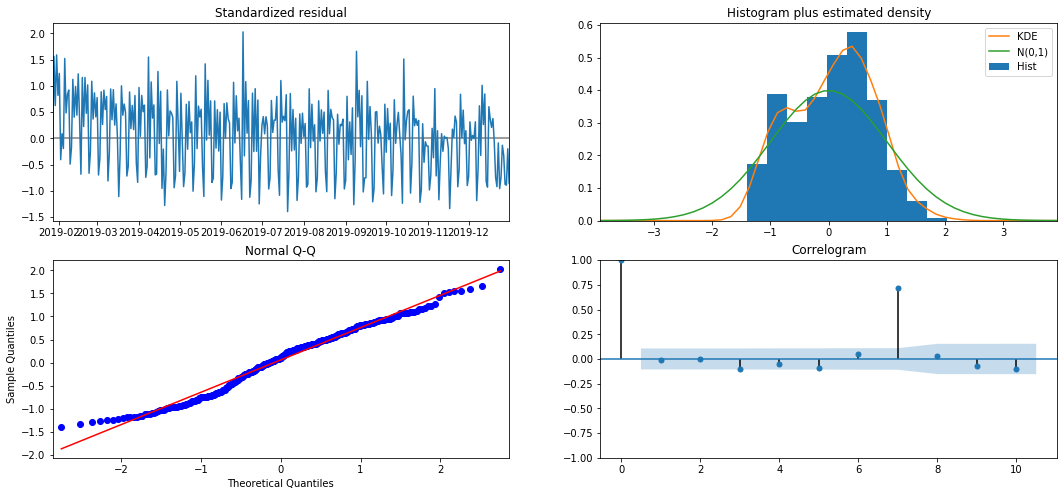

In [11]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

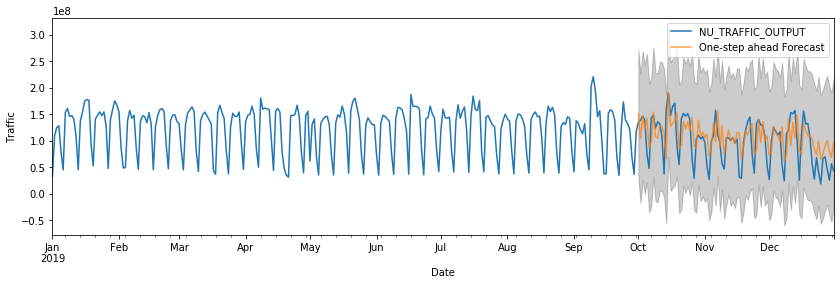

In [12]:
pred = results.get_prediction(start=pd.to_datetime('2019-10-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = dfMean['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Traffic')
plt.legend()
plt.show()

In [13]:
dfMean.shape

(365, 1)

Vamos a probar hacer hasta octubre y predecir noviembre

In [14]:
start_date = pd.to_datetime('2019')
end_date = pd.to_datetime('2019-11-01')
dfMean['DT_MEASURE_DATETIME'] = dfMean.index.values
#dfMean = pd.DataFrame(dfMean)
#dfMean['DT_MEASURE_DATETIME'] = dfMean.index.values
mask = (dfMean['DT_MEASURE_DATETIME'] > start_date) & (dfMean['DT_MEASURE_DATETIME'] <= end_date)
df = dfMean[mask]
df.head()

,NU_TRAFFIC_OUTPUT,DT_MEASURE_DATETIME
DT_MEASURE_DATETIME,,
2019-01-02,1.093982e+08,2019-01-02
2019-01-03,1.251888e+08,2019-01-03
2019-01-04,1.282887e+08,2019-01-04
2019-01-05,7.845380e+07,2019-01-05
2019-01-06,4.493405e+07,2019-01-06


In [15]:
print(df.shape)
print(dfMean.shape)

(304, 2)
(365, 2)


In [16]:
start_date = pd.to_datetime('2019-11-01')
end_date = pd.to_datetime('2019-11-30')
dfMean['DT_MEASURE_DATETIME'] = dfMean.index.values
#dfMean = pd.DataFrame(dfMean)
#dfMean['DT_MEASURE_DATETIME'] = dfMean.index.values
mask = (dfMean['DT_MEASURE_DATETIME'] > start_date) & (dfMean['DT_MEASURE_DATETIME'] <= end_date)
dfFin = dfMean[mask]

In [17]:
print(df.shape)
print(dfFin.shape)

(304, 2)
(29, 2)


In [18]:
df = df.drop(['DT_MEASURE_DATETIME'], axis = 1)
dfFin = dfFin.drop(['DT_MEASURE_DATETIME'], axis = 1)

print(df.shape)
print(dfFin.shape)

(304, 1)
(29, 1)


In [19]:
dfFin

,NU_TRAFFIC_OUTPUT
DT_MEASURE_DATETIME,
2019-11-02,5.174112e+07
2019-11-03,2.680875e+07
2019-11-04,9.871830e+07
2019-11-05,1.102658e+08
2019-11-06,1.577303e+08
2019-11-07,1.110799e+08
2019-11-08,9.700081e+07
2019-11-09,5.651336e+07
2019-11-10,4.640930e+07


In [20]:
mod = sm.tsa.statespace.SARIMAX(df,
                                order=(0, 0, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6106      0.103      5.910      0.000       0.408       0.813
ar.S.L12      -0.1596      0.187     -0.855      0.393      -0.525       0.206
ma.S.L12      -0.6920      0.108     -6.423      0.000      -0.903      -0.481
sigma2      4.125e+15        nan        nan        nan         nan         nan


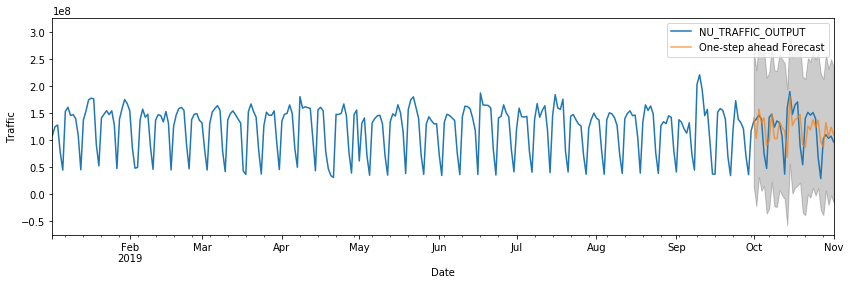

In [21]:
pred = results.get_prediction(start=pd.to_datetime('2019-10-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = df['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Traffic')
plt.legend()
plt.show()

# A días 

In [22]:

train= df 
test= dfFin
# Fit a simple auto_arima model
modl = pm.auto_arima(train,
                  seasonal=True,
                  stepwise=True, suppress_warnings=True, 
                  error_action='ignore')

# Create predictions for the future, evaluate on test
preds, conf_int = modl.predict(n_periods=test.shape[0], return_conf_int=True)

# Print the error:
print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(test, preds)))


Test RMSE: 35846537.545


In [23]:
Noviembre = pd.date_range(pd.to_datetime('2019-11-02'), pd.to_datetime('2019-11-30') )
hastaNoviembre = pd.date_range(pd.to_datetime('2019-01-02'), pd.to_datetime('2019-11-01') )
print(hastaNoviembre.shape)
print(Noviembre.shape)

(304,)
(29,)


In [32]:
Noviembre

DatetimeIndex(['2019-11-02', '2019-11-03', '2019-11-04', '2019-11-05',
               '2019-11-06', '2019-11-07', '2019-11-08', '2019-11-09',
               '2019-11-10', '2019-11-11', '2019-11-12', '2019-11-13',
               '2019-11-14', '2019-11-15', '2019-11-16', '2019-11-17',
               '2019-11-18', '2019-11-19', '2019-11-20', '2019-11-21',
               '2019-11-22', '2019-11-23', '2019-11-24', '2019-11-25',
               '2019-11-26', '2019-11-27', '2019-11-28', '2019-11-29',
               '2019-11-30'],
              dtype='datetime64[ns]', freq='D')

In [24]:
print(preds.shape)
print(train.shape)

(29,)
(304, 1)


                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  304
Model:               SARIMAX(5, 0, 5)   Log Likelihood               -5601.876
Date:                Tue, 11 Feb 2020   AIC                          11227.753
Time:                        10:07:48   BIC                          11272.357
Sample:                             0   HQIC                         11245.595
                                - 304                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.931e+08      2e-09   1.46e+17      0.000    2.93e+08    2.93e+08
ar.L1          0.4879      0.028     17.580      0.000       0.434       0.542
ar.L2         -1.1866      0.023    -51.280      0.0

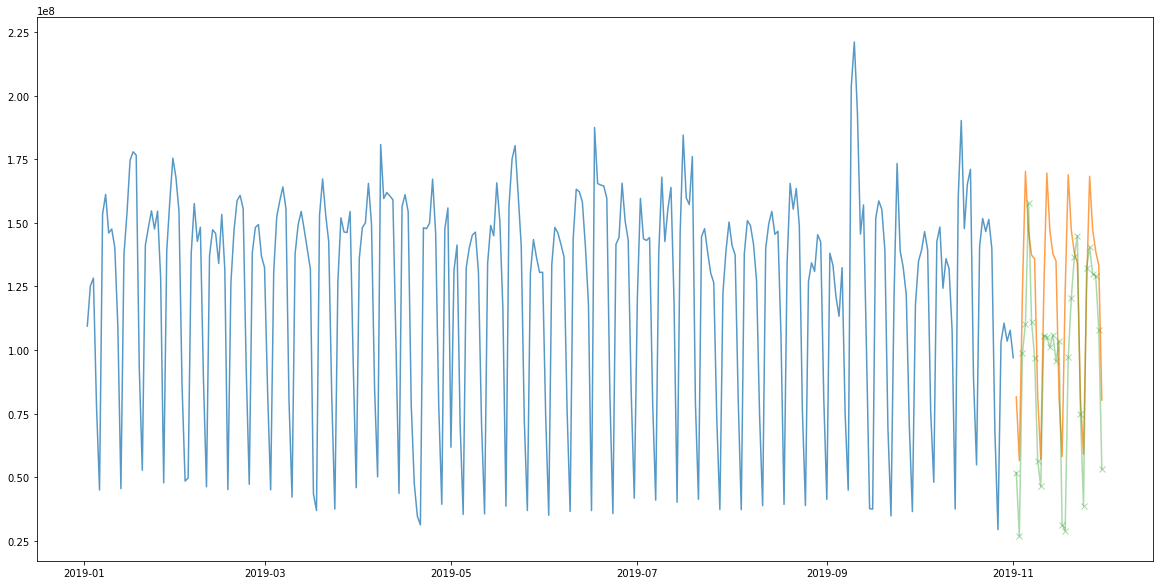

In [25]:

# #############################################################################
# Plot the points and the forecasts


plt.figure(figsize=(20,10))
plt.plot(hastaNoviembre, train, alpha=0.75)
plt.plot(Noviembre, preds, alpha=0.75)  # Forecasts
plt.plot(Noviembre, test, alpha=0.4, marker='x')  # Test data


print(modl.summary())

In [26]:
print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(test, preds)))


Test RMSE: 35846537.545


In [28]:
np.sqrt(mean_squared_error(test, preds))/8/1000000

4.4808171931250005

# A meses

In [29]:
## predecir noviembre tomando dos meses como entrenamiento

In [30]:
start_date = pd.to_datetime('2019-08-31')
end_date = pd.to_datetime('2019-11-01')
dfMean['DT_MEASURE_DATETIME'] = dfMean.index.values
#dfMean = pd.DataFrame(dfMean)
#dfMean['DT_MEASURE_DATETIME'] = dfMean.index.values
mask = (dfMean['DT_MEASURE_DATETIME'] > start_date) & (dfMean['DT_MEASURE_DATETIME'] <= end_date)
df = dfMean[mask]
df.head()

,NU_TRAFFIC_OUTPUT,DT_MEASURE_DATETIME
DT_MEASURE_DATETIME,,
2019-09-01,4.125204e+07,2019-09-01
2019-09-02,1.381112e+08,2019-09-02
2019-09-03,1.333716e+08,2019-09-03
2019-09-04,1.209324e+08,2019-09-04
2019-09-05,1.132732e+08,2019-09-05


In [31]:
start_date = pd.to_datetime('2019-10-31')
end_date = pd.to_datetime('2019-11-30')
dfMean['DT_MEASURE_DATETIME'] = dfMean.index.values
#dfMean = pd.DataFrame(dfMean)
#dfMean['DT_MEASURE_DATETIME'] = dfMean.index.values
mask = (dfMean['DT_MEASURE_DATETIME'] > start_date) & (dfMean['DT_MEASURE_DATETIME'] <= end_date)
dfFin = dfMean[mask]

In [32]:
print(df.shape)
print(dfFin.shape)

df = df.drop(['DT_MEASURE_DATETIME'], axis = 1)
dfFin = dfFin.drop(['DT_MEASURE_DATETIME'], axis = 1)

print(df.shape)
print(dfFin.shape)

(62, 2)
(30, 2)
(62, 1)
(30, 1)


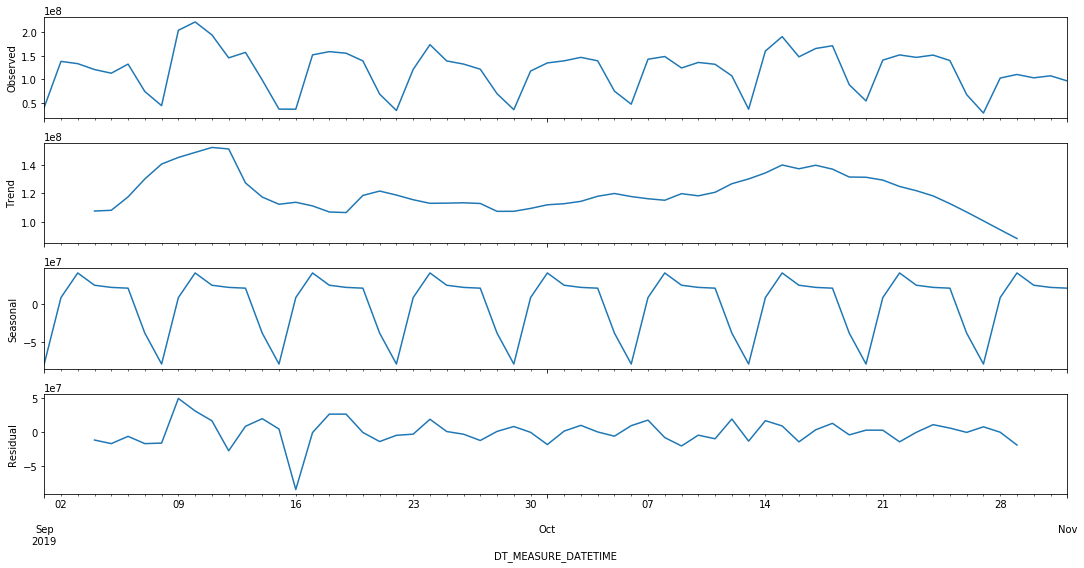

In [33]:
train= df 
test= dfFin
res = sm.tsa.seasonal_decompose(df.dropna())
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

In [34]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.NU_TRAFFIC_OUTPUT.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
    


ADF Statistic: -2.339877
p-value: 0.159429
Critical Values:
	1%: -3.558
	5%: -2.917
	10%: -2.596


In [35]:
result = adfuller(df.NU_TRAFFIC_OUTPUT.diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))


ADF Statistic: -8.522534
p-value: 0.000000
Critical Values:
	1%: -3.555
	5%: -2.916
	10%: -2.596


/Users/lopoloalex/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


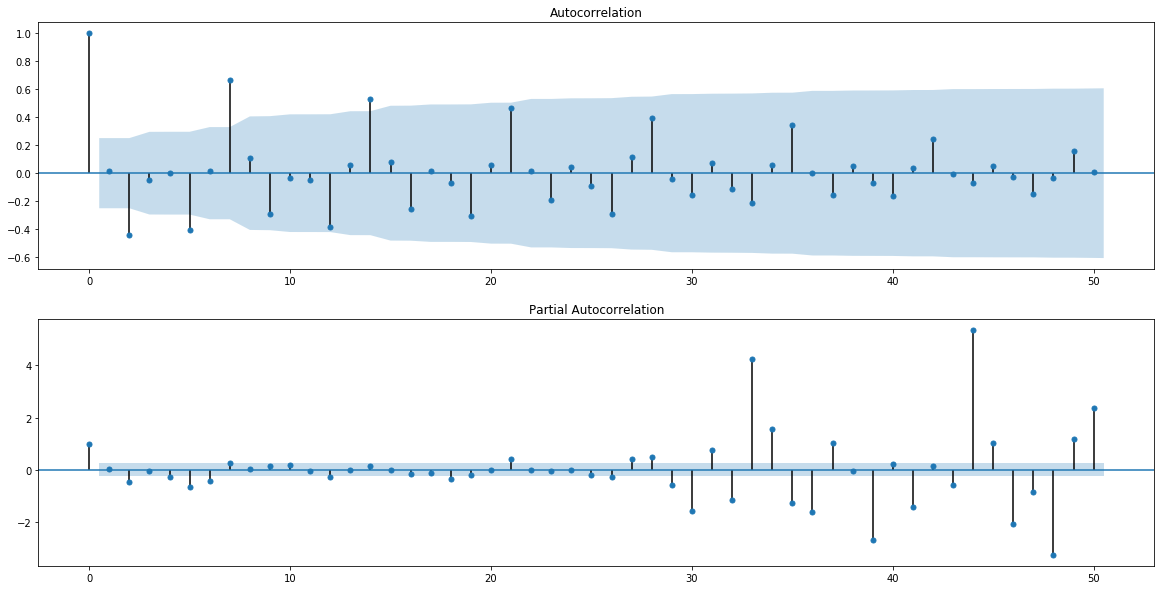

In [34]:
fig,ax = plt.subplots(2,1,figsize=(20,10))
fig = plot_acf(df.diff().dropna(), lags=50, ax=ax[0])
fig = plot_pacf(df.diff().dropna(), lags=50, ax=ax[1])
plt.show()



In [194]:
resDiff = sm.tsa.arma_order_select_ic(df, max_ar=7, max_ma=7, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

/Users/lopoloalex/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/lopoloalex/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/lopoloalex/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:221: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)
/Users/lopoloalex/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/lopoloalex/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(

/Users/lopoloalex/anaconda3/lib/python3.7/site-packages/statsmodels/tools/numdiff.py:243: RuntimeWarning: invalid value encountered in multiply
  **kwargs)).imag/2./hess[i, j]
/Users/lopoloalex/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/lopoloalex/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/lopoloalex/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/lopoloalex/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals

ARMA(p,q) = (5, 4) is the best.


Test RMSE: 36884411.259
(62,)
(30,)
(30,)
(62, 1)
                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                   62
Model:             SARIMAX(2, 1, 2)x(1, 0, 0, 12)   Log Likelihood               -1150.653
Date:                            Tue, 11 Feb 2020   AIC                           2315.307
Time:                                    10:21:02   BIC                           2330.083
Sample:                                         0   HQIC                          2321.098
                                             - 62                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -5.242e+05   8.92e-10  -5.88e+14      0.000   -5.24e+

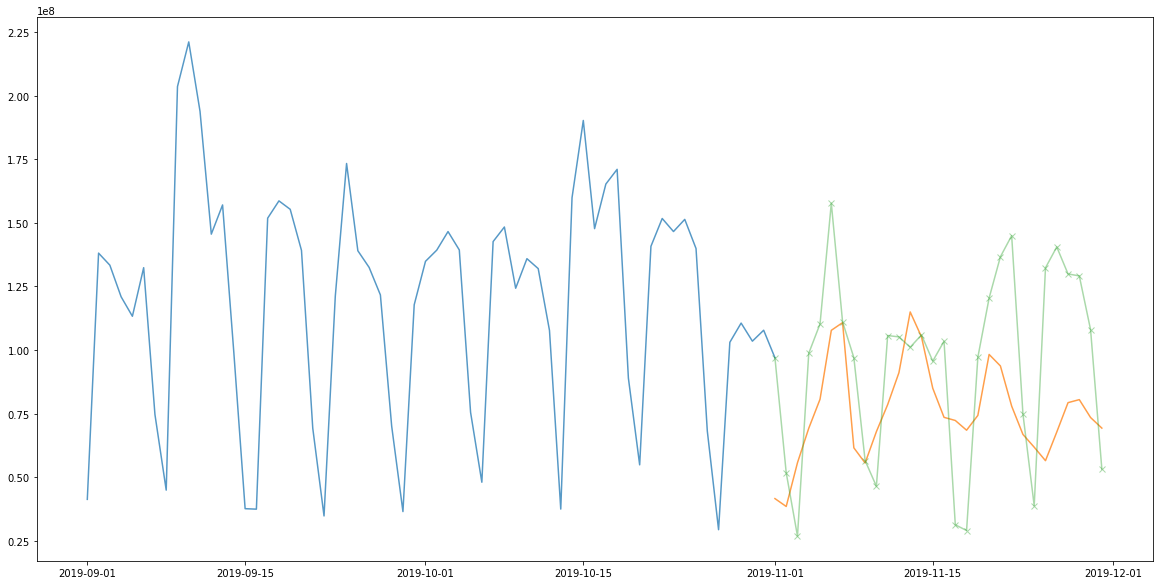

In [53]:

# Fit a simple auto_arima model
modl = pm.auto_arima(train, start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=10, max_q=5, d=1, max_P=5, max_Q=5,m=12, seasonal=True,
                  stepwise=True, suppress_warnings=True, D=0, max_D=5,
                  error_action='ignore')
                     
# Create predictions for the future, evaluate on test
preds, conf_int = modl.predict(n_periods=test.shape[0], return_conf_int=True)

# Print the error:
print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(test, preds)))

Noviembre = pd.date_range(pd.to_datetime('2019-11-01'), pd.to_datetime('2019-11-30') )
hastaNoviembre = pd.date_range(pd.to_datetime('2019-09-01'), pd.to_datetime('2019-11-01') )
print(hastaNoviembre.shape)
print(Noviembre.shape)
print(preds.shape)
print(train.shape)

# #############################################################################
# Plot the points and the forecasts


plt.figure(figsize=(20,10))
plt.plot(hastaNoviembre, train, alpha=0.75)
plt.plot(Noviembre, preds, alpha=0.75)  # Forecasts
plt.plot(Noviembre, test, alpha=0.4, marker='x')  # Test data


print(modl.summary())

#  Pruebas1

In [38]:
sarima = sm.tsa.statespace.SARIMAX(df,order=(7,1,7),seasonal_order=(7,1,7,1),
                                enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
sarima.summary()



/Users/lopoloalex/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/lopoloalex/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/Users/lopoloalex/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/lopoloalex/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/lopoloalex/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                 NU_TRAFFIC_OUTPUT   No. Observations:                   62
Model:             SARIMAX(7, 1, 7)x(7, 1, 7, 1)   Log Likelihood                -808.817
Date:                           Tue, 11 Feb 2020   AIC                           1675.635
Time:                                   10:11:32   BIC                           1728.028
Sample:                               09-01-2019   HQIC                          1695.167
                                    - 11-01-2019                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8304   4.83e+04  -1.72e-05      1.000   -9.46e+04    9.46e+04
ar.L2         -0.7504   6.32e+04  -1.19e-05      1.000   -1.24e+05    1.24e+05
ar.L3         -0.8255   6.48e+04  -1.27e-05      1.000   -1.27e+05    1.27e+05
ar.L4         -0.6790   4.83e+04  -1.41e-05      1.000   -9.46e+04    9.46e+04
ar.L5         -0.7591   2.63e+04  -2.88e-05      1.000   -5.16e+04    5.16e+04
ar.L6         -0.7305   2.26e+04  -3.24e-05      1.000   -4.42e+04    4.42e+04
ar.L7          0.1576   3.19e+04   4.94e-06      1.000   -6.25e+04    6.25e+04
ma.L1          0.2162        nan        nan        nan         nan         nan
ma.L2          0.0152    351.367   4.32e-05      1.000    -688.651     688.681
ma.L3          0.2315    304.292      0.001      0.999    -596.169     596.632
ma.L4         -0.0652     87.612     -0.001      0.999    -171.781     171.651
ma.L5          0.1521    416.572      0.000      1.000    -816.315     816.619
ma.L6          0.2002    558.652      0.000      1.000   -1094.738    1095.139
ma.L7         -0.5997    239.212     -0.003      0.998    -469.446     468.246
ar.S.L1       -0.8304   4.83e+04  -1.72e-05      1.000   -9.46e+04    9.46e+04
ar.S.L2       -0.7504   6.32e+04  -1.19e-05      1.000   -1.24e+05    1.24e+05
ar.S.L3       -0.8255   6.48e+04  -1.27e-05      1.000   -1.27e+05    1.27e+05
ar.S.L4       -0.6790   4.83e+04  -1.41e-05      1.000   -9.46e+04    9.46e+04
ar.S.L5       -0.7591   2.63e+04  -2.88e-05      1.000   -5.16e+04    5.16e+04
ar.S.L6       -0.7305   2.26e+04  -3.24e-05      1.000   -4.42e+04    4.42e+04
ar.S.L7        0.1576   3.19e+04   4.94e-06      1.000   -6.25e+04    6.25e+04
ma.S.L1        0.2162        nan        nan        nan         nan         nan
ma.S.L2        0.0152    350.393   4.33e-05      1.000    -686.743     686.774
ma.S.L3        0.2315    303.863      0.001      0.999    -595.329     595.792
ma.S.L4       -0.0652     87.278     -0.001      0.999    -171.127     170.997
ma.S.L5        0.1521    415.765      0.000      1.000    -814.733     815.037
ma.S.L6        0.2002    558.354      0.000      1.000   -1094.154    1094.554
ma.S.L7       -0.5997    239.309     -0.003      0.998    -469.637     468.438
sigma2      3.457e+14    4.7e-06   7.36e+19      0.000    3.46e+14    3.46e+14
===================================================================================
Ljung-Box (Q):                       22.37   Jarque-Bera (JB):                 1.59
Prob(Q):                              0.99   Prob(JB):                         0.45
Heteroskedasticity (H):               1.22   Skew:                             0.46
Prob(H) (two-sided):                  0.70   Kurtosis:                         3.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covarianc

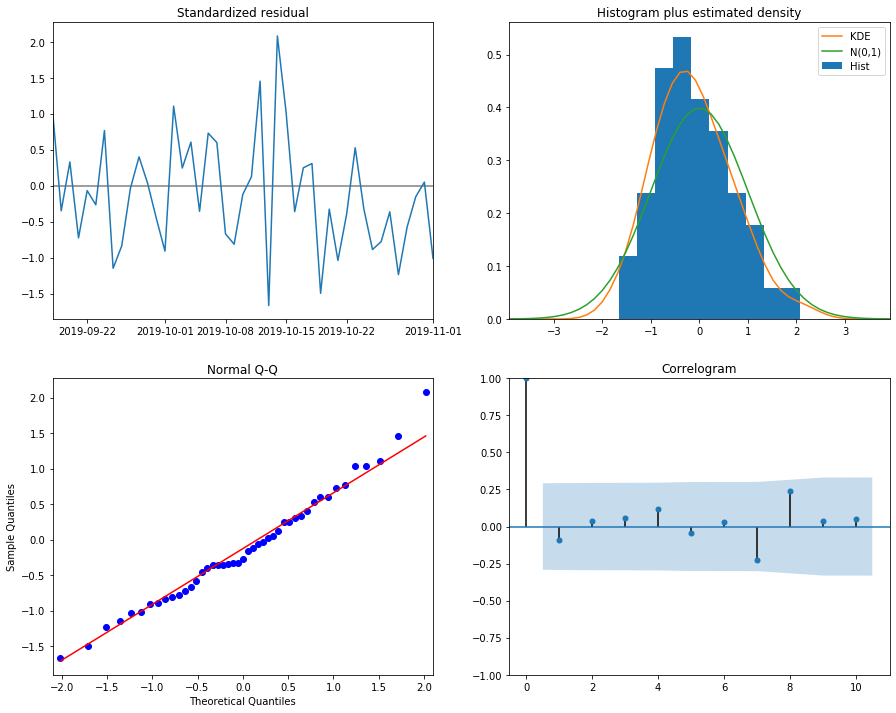

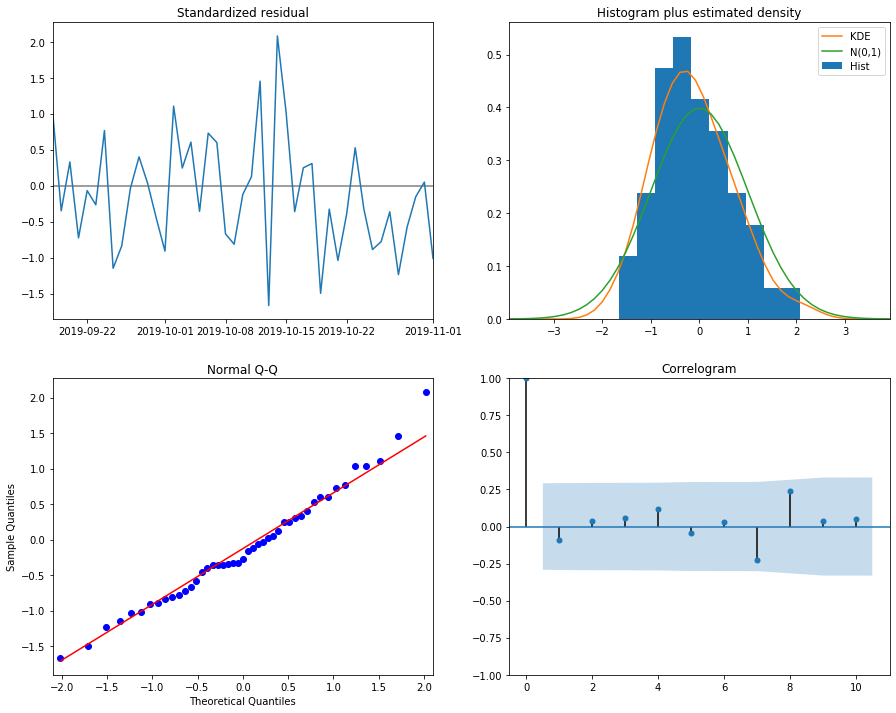

In [39]:
sarima.plot_diagnostics(figsize=(15, 12))


In [40]:
#traindata predict
pred = sarima.forecast(20)
pred

2019-11-02    3.217945e+07
2019-11-03   -3.120917e+06
2019-11-04    7.327987e+07
2019-11-05    8.395205e+07
2019-11-06    7.407023e+07
2019-11-07    6.734353e+07
2019-11-08    7.722316e+07
2019-11-09    7.152883e+06
2019-11-10   -2.622888e+07
2019-11-11    4.257586e+07
2019-11-12    5.392199e+07
2019-11-13    4.292009e+07
2019-11-14    3.358213e+07
2019-11-15    5.066603e+07
2019-11-16   -2.026108e+07
2019-11-17   -4.951967e+07
2019-11-18    1.095188e+07
2019-11-19    2.480570e+07
2019-11-20    1.109581e+07
2019-11-21    6.101830e+05
Freq: 24H, dtype: float64

In [41]:
pred = sarima.predict('2019-09-01','2019-12-01')[1:]

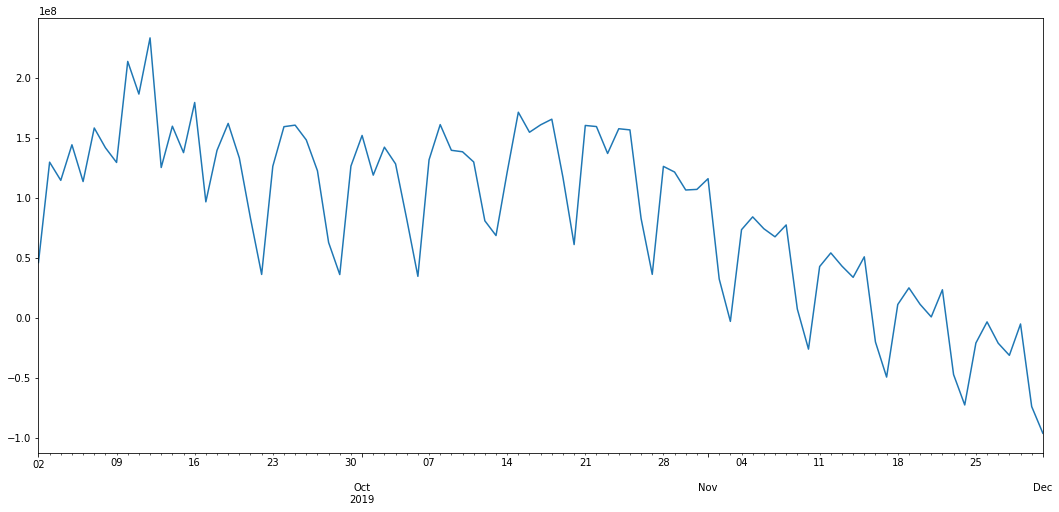

In [42]:
pred.plot()

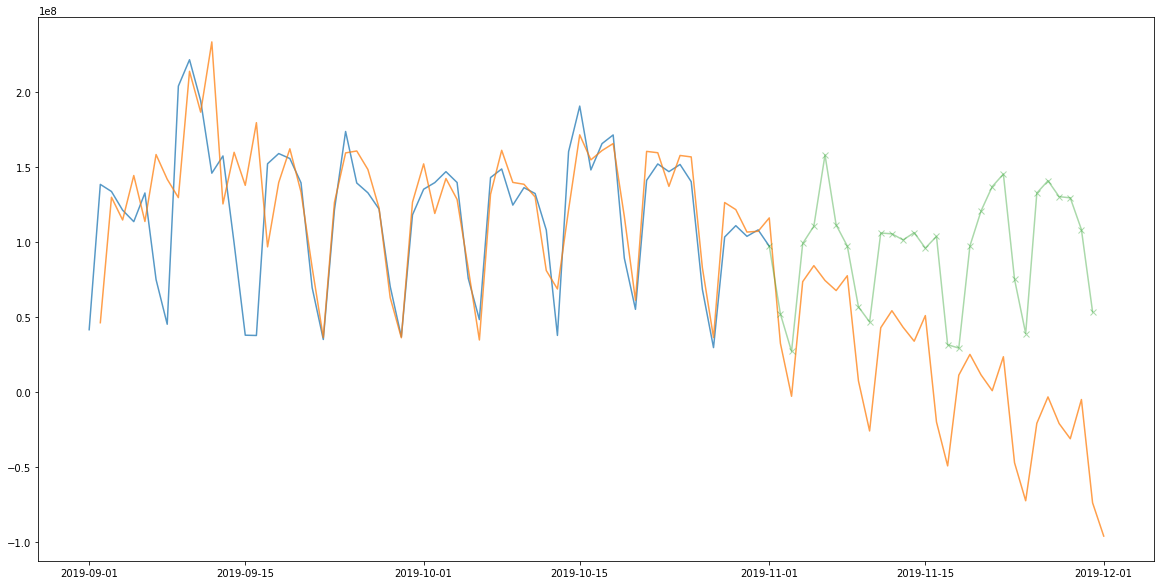

In [43]:
Noviembre = pd.date_range(pd.to_datetime('2019-11-01'), pd.to_datetime('2019-11-30') )
hastaNoviembre = pd.date_range(pd.to_datetime('2019-09-01'), pd.to_datetime('2019-11-01') )
# #############################################################################
# Plot the points and the forecasts


plt.figure(figsize=(20,10))
plt.plot(hastaNoviembre, train, alpha=0.75)
plt.plot(pred, alpha=0.75)  # Forecasts
plt.plot(Noviembre, test, alpha=0.4, marker='x')  # Test data
